Calories Burnt System Machine Learning Project

In [98]:
#import libraries
import warnings
warnings.filterwarnings('ignore')

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error
import difflib
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [100]:
#loading data from csv file to a pandas dataframe
df=pd.read_csv('calories.csv')

In [101]:
#print first five row in a data set
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [102]:
#last five value of dataset
df.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [103]:
#Display five random value of dataset
df.sample()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
10629,17806103,female,50,167.0,62.0,22.0,100.0,40.8,129.0


In [104]:
#check the number of rows and column (check the shape or totalsize)
df.shape

(15000, 9)

In [105]:
#get the information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [106]:
#check any missing value present in dataset
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data analysis:-

In [107]:
#get the statistical information about dataset
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data visualization:-

In [108]:
sns.set()

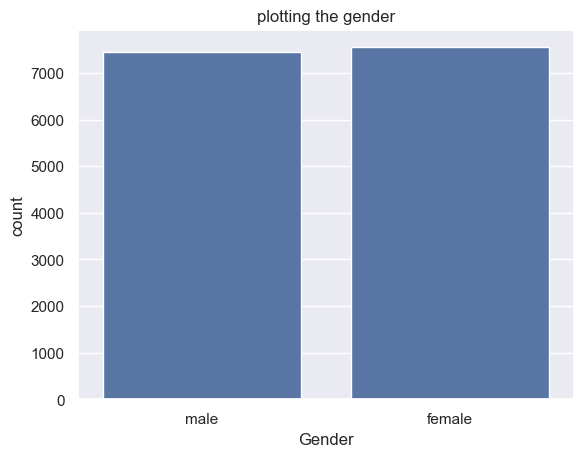

In [109]:
#plotting the gender column in count plot
sns.countplot(data=df,x='Gender')
plt.title('plotting the gender')
plt.show()

Text(0.5, 1.0, 'Plotting the age column ')

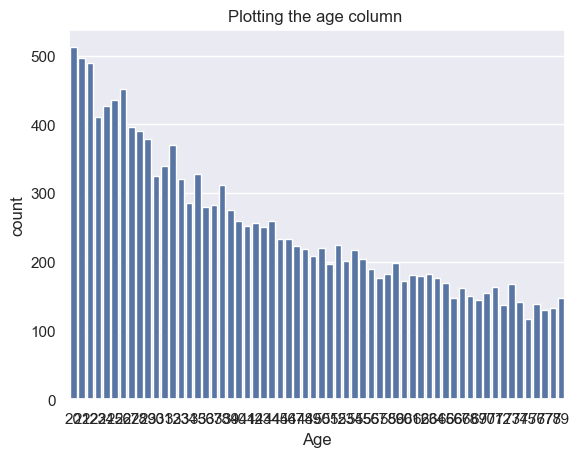

In [110]:
sns.countplot(data=df,x='Age')
plt.title('Plotting the age column ')

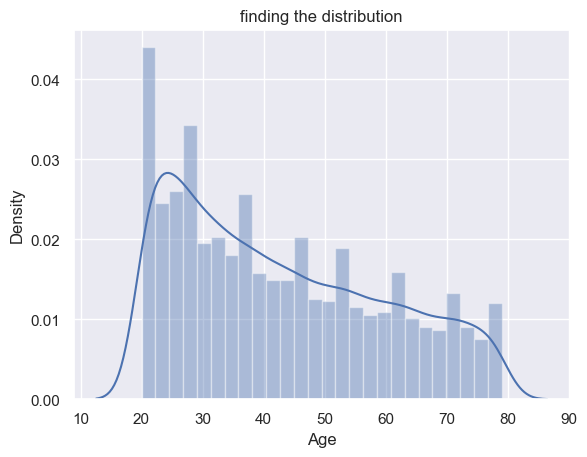

In [111]:
#finding the distribution of age column
sns.distplot(df['Age'])
plt.title("finding the distribution")
plt.show()

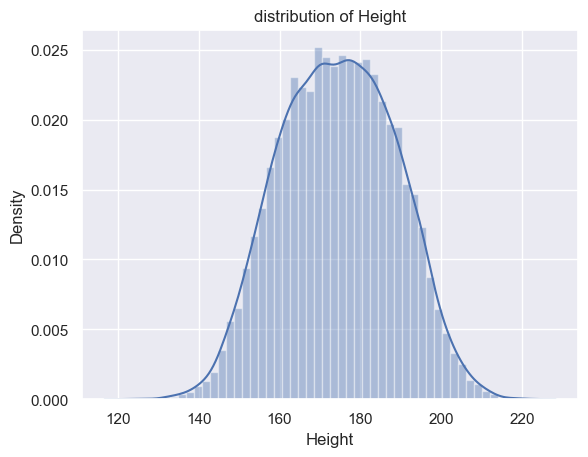

In [112]:
#finding the distrbution of Height column
sns.distplot(df['Height'])
plt.title('distribution of Height')
plt.show()

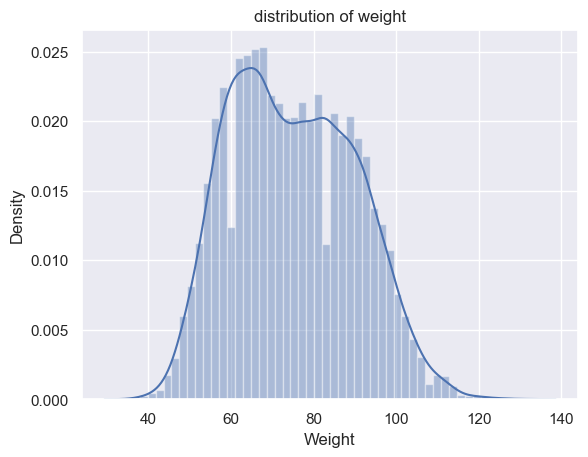

In [113]:
#finding the distribution Weight column
sns.distplot(df['Weight'])
plt.title("distribution of weight")
plt.show()

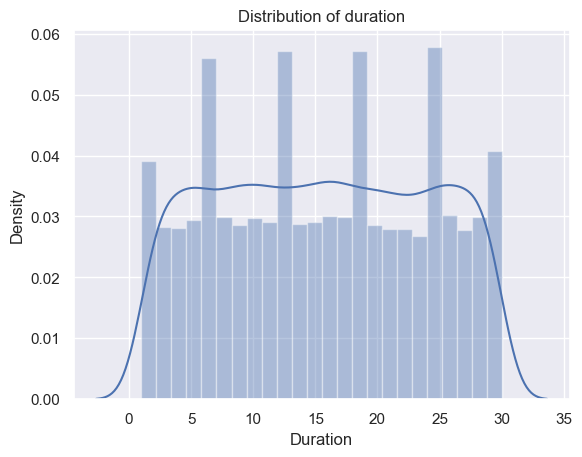

In [114]:
#finding the distribution of Duration column
sns.distplot(df['Duration'])
plt.title('Distribution of duration')
plt.show()

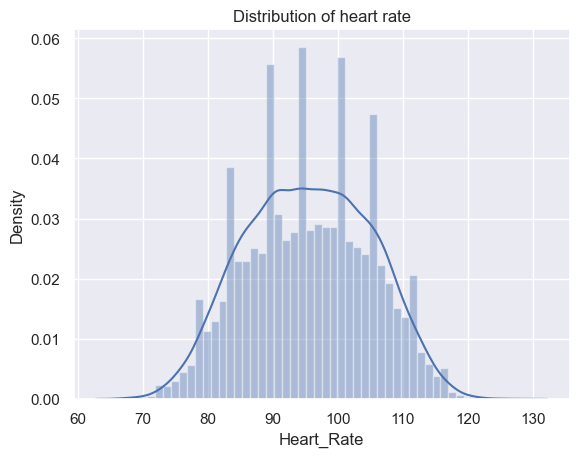

In [115]:
#finding the distribution of heart rate column
sns.distplot(df['Heart_Rate'])
plt.title('Distribution of heart rate')
plt.show()

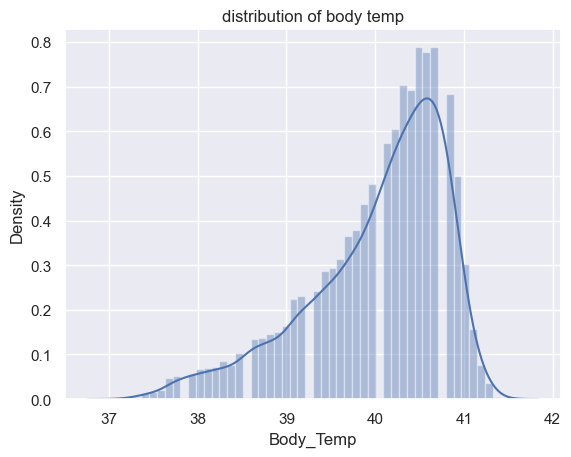

In [116]:
#finding the distribution of Body temperatue
sns.distplot(df['Body_Temp'])
plt.title('distribution of body temp')
plt.show()

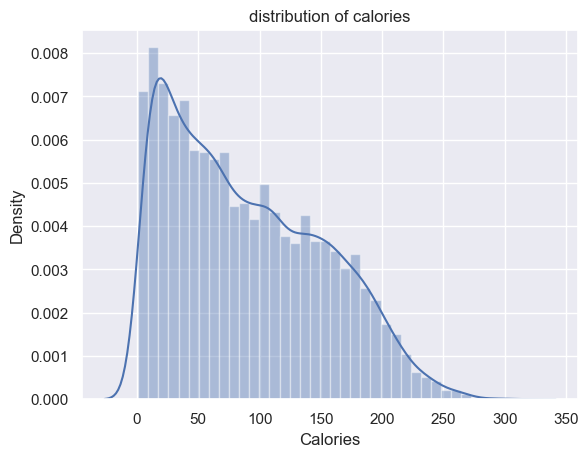

In [117]:
#finding the distribution of Calories
sns.distplot(df['Calories'])
plt.title('distribution of calories')
plt.show()

Finding the correlation in the dataset

1.Positive correlation

2.Negative correlation

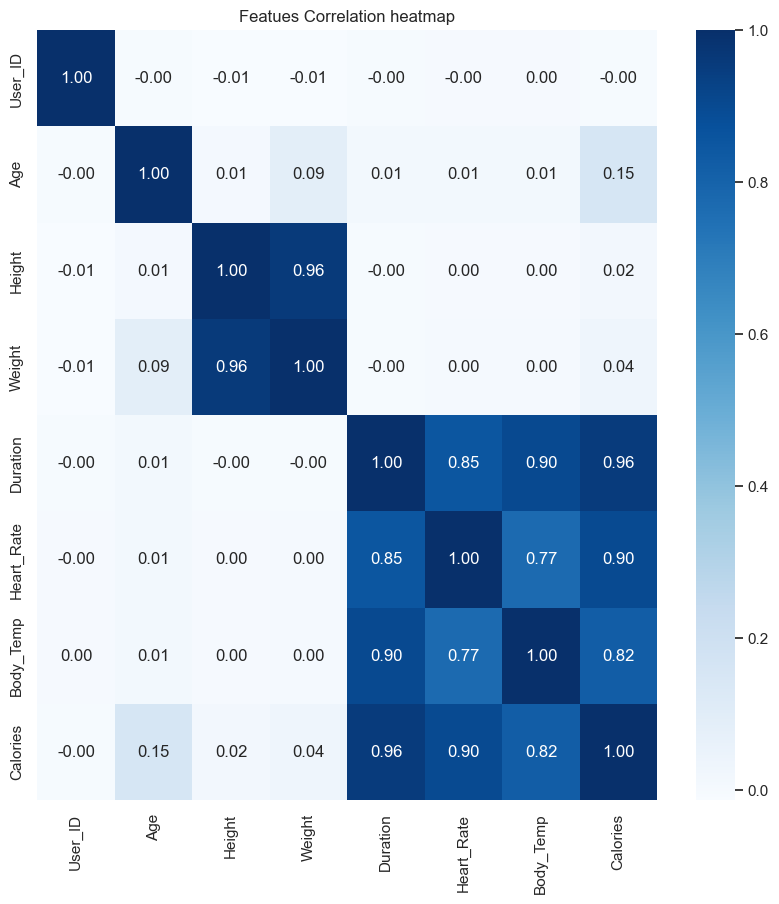

In [118]:
#Constructing a heatmap to understsand 
plt.figure(figsize=(10,10))
num_df=df.select_dtypes(include='number')
sns.heatmap(num_df.corr(),cbar=True,fmt='.2f',annot=True,cmap='Blues')
plt.title("Featues Correlation heatmap")
plt.show()


Converting the text data to numerical value

In [119]:
#replace gender
df.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [120]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Sperating features and target

In [121]:
#seperate feature and target values
x=df.drop(['User_ID','Calories'],axis=1)
y=df['Calories']
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [122]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and test data

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [124]:
x_train.shape

(12000, 7)

In [125]:
x_test.shape

(3000, 7)

In [126]:
y_train.shape

(12000,)

In [127]:
y_test.shape

(3000,)

Model Training

XGBoost Regressor

In [128]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [129]:
#training the model x_train y_train
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Prediction on Test Data

In [130]:
y_pred=xgb.predict(x_test)
print(y_pred)

[172.07645  195.7858    51.708874 ... 121.50776   19.239851 214.43597 ]


Mean absolute error

In [131]:
print("MAE:",mean_absolute_error(y_pred,y_test))
print('RMSE:',root_mean_squared_error(y_pred,y_test))
print('R2 Score:',r2_score(y_pred,y_test))

MAE: 1.4981198125282924
RMSE: 2.1375116634132594
R2 Score: 0.9988676620975356


Calculating the Intercept

In [132]:
print(xgb.intercept_)

[89.09541]


Model Training

Linear Regression

In [137]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [138]:
y_pred=lr.predict(x_test)
print(y_pred)

[170.67646027 192.08857813  56.14796403 ... 129.66570069   2.4152784
 191.99081681]


In [139]:
print("MAE:",mean_absolute_error(y_pred,y_test))
print('RMSE:',root_mean_squared_error(y_pred,y_test))
print('R2 Score:',r2_score(y_pred,y_test))

MAE: 8.441513553849715
RMSE: 11.488940149152876
R2 Score: 0.9658035728771159


In [141]:
from sklearn.ensemble import RandomForestRegressor
rg=RandomForestRegressor()
rg.fit(x_train,y_train)

RandomForestRegressor()

In [142]:
y_pred=rg.predict(x_test)
print(y_pred)

[169.52 192.23  53.05 ... 119.91  19.7  213.73]


In [143]:
print("MAE:",mean_absolute_error(y_pred,y_test))
print('RMSE:',root_mean_squared_error(y_pred,y_test))
print('R2 Score:',r2_score(y_pred,y_test))

MAE: 1.6868699999999999
RMSE: 2.6426873758858926
R2 Score: 0.9982505548695343
